In [33]:
import sys
import os
import matplotlib.pyplot as plt
os.environ["CUDA_VISIBLE_DEVICES"]=""
import glob
sys.path.append("../AnalyzeCSV")
import numpy as np
from tifffile import imread
from CreateImages import TimelapseImage, TwoDImage, CountTimeLapseevents,MultiCountTimeLapseevents
try:
    from pathlib import Path
    Path().expanduser()
except (ImportError,AttributeError):
    from pathlib2 import Path

try:
    import tempfile
    tempfile.TemporaryDirectory
except (ImportError,AttributeError):
    from backports import tempfile

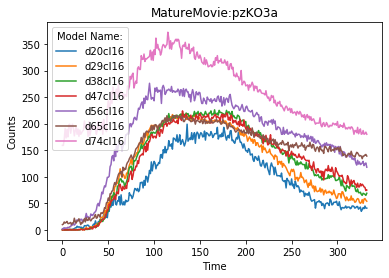

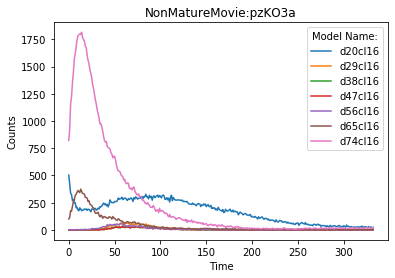

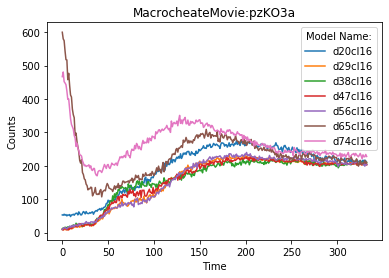

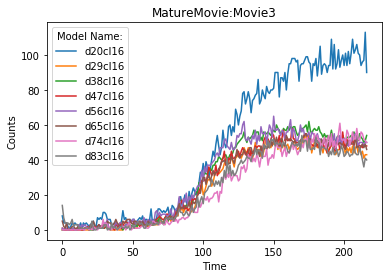

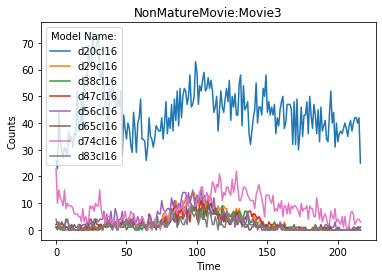

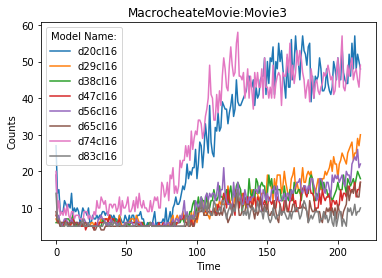

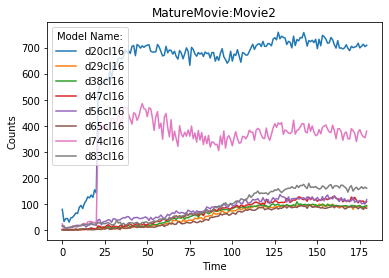

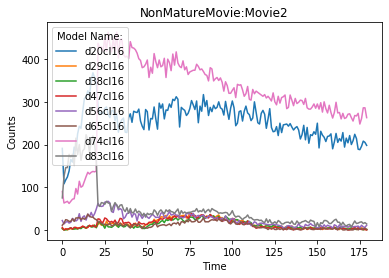

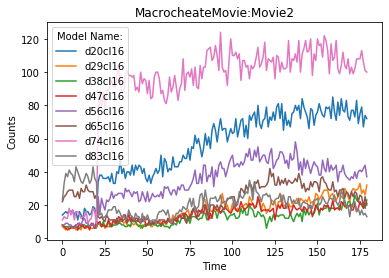

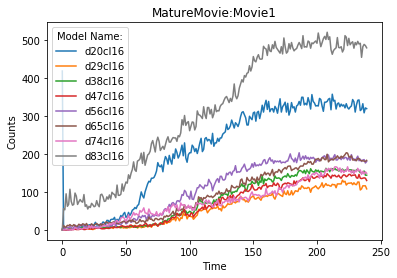

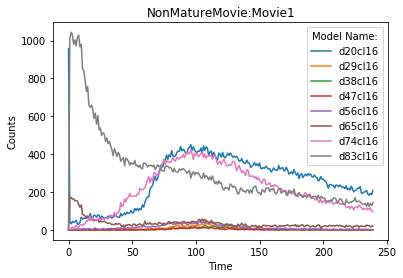

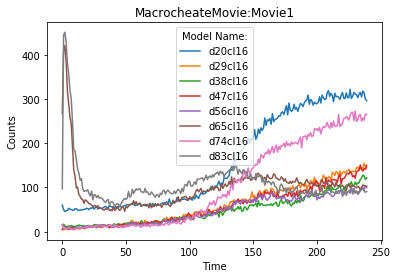

In [34]:
csv_dir = ['/Users/aimachine/ONEATTests/Movies/StaticEvents/CSVResults/d20cl16/', '/Users/aimachine/ONEATTests/Movies/StaticEvents/CSVResults/d29cl16/',
          '/Users/aimachine/ONEATTests/Movies/StaticEvents/CSVResults/d38cl16/','/Users/aimachine/ONEATTests/Movies/StaticEvents/CSVResults/d47cl16/',
          '/Users/aimachine/ONEATTests/Movies/StaticEvents/CSVResults/d56cl16/','/Users/aimachine/ONEATTests/Movies/StaticEvents/CSVResults/d65cl16/',
          '/Users/aimachine/ONEATTests/Movies/StaticEvents/CSVResults/d74cl16/','/Users/aimachine/ONEATTests/Movies/StaticEvents/CSVResults/d83cl16/']
image_dir =  '/Users/aimachine/ONEATTests/Movies/'
save_dir = '/Users/aimachine/ONEATTests/Movies/StaticEvents/CSVResults/AllResults/' 

    
Raw_path = os.path.join(image_dir,'*.tif')
X = glob.glob(Raw_path)




Path(save_dir).mkdir(exist_ok = True)

for image_file in X:

  image= imread(image_file)
  image = np.asarray(image)
  Name = os.path.basename((os.path.splitext(image_file)[0])) 
  
  MasterTimeListNonMature = []
  MasterEventListNonMature = []

  MasterTimeListMature = []
  MasterEventListMature = []

  MasterTimeListMacrocheate = []
  MasterEventListMacrocheate = []

  MasterModelName = []
   
  
  for i in range(0, len(csv_dir)):
    
 

    

    ModelName = os.path.basename(os.path.dirname(csv_dir[i]))
    
    Mature = 'CNNMatureMNMCNNresnet_v2' + ModelName + 'Location'
    NonMature = 'CNNNonMatureMNMCNNresnet_v2'+ ModelName + 'Location'
    Macrocheate = 'CNNMacroKittyMNMCNNresnet_v2'+ ModelName + 'Location'
    MasterModelName = MasterModelName + [ModelName]

    #Mature Events 
    csv_Name = Mature + Name
    csv_file = csv_dir[i] + csv_Name + '.csv'
   
    if os.path.exists(csv_file):

      MasterTimeListMature,EventListMature = MultiCountTimeLapseevents(csv_file,image, 'Mature' + Name, save_dir)
      MasterEventListMature.append(EventListMature)
    #NonMature Events 
    csv_Name = NonMature + Name
    csv_file = csv_dir[i] + csv_Name + '.csv'

    if os.path.exists(csv_file):

      MasterTimeListNonMature,EventListNonMature = MultiCountTimeLapseevents(csv_file,image, 'NonMature' + Name, save_dir) 
      MasterEventListNonMature.append(EventListNonMature)
    #Macrocheate Events 
    csv_Name = Macrocheate + Name
    csv_file = csv_dir[i] + csv_Name + '.csv'

    if os.path.exists(csv_file):

      MasterTimeListMacrocheate,EventListMacrocheate = MultiCountTimeLapseevents(csv_file,image, 'MacroCheate'+ Name, save_dir)   
      MasterEventListMacrocheate.append(EventListMacrocheate)
     


  for i in range(0, len(MasterEventListMature)):
        plt.plot(MasterTimeListMature, MasterEventListMature[i],  label = MasterModelName[i])
        plt.ylabel('Counts')
        plt.xlabel('Time')
  plt.legend(title='Model Name:')
  plt.title('Mature' + '' + 'Movie:' + Name)
  plt.savefig(save_dir  + 'Mature' + Name + 'All'   + '.png') 
  
  plt.show()

  for i in range(0, len(MasterEventListNonMature)):


        plt.plot(MasterTimeListNonMature, MasterEventListNonMature[i],  label = MasterModelName[i])
        plt.ylabel('Counts')
        plt.xlabel('Time')
        plt.legend(MasterModelName[i])
  plt.legend(title='Model Name:')
  plt.title( 'NonMature' + '' + 'Movie:' + Name)      
  plt.savefig(save_dir  + 'NonMature' + Name + 'All'  + '.png') 

  plt.show()
  #plt.figure(figsize=(15,15))
  for i in range(0, len(MasterEventListMacrocheate)):

        plt.plot(MasterTimeListMacrocheate, MasterEventListMacrocheate[i],  label = MasterModelName[i])
        plt.ylabel('Counts')
        plt.xlabel('Time')
  plt.legend(title='Model Name:')
  plt.title('Macrocheate'  +'' + 'Movie:' + Name)
  plt.savefig(save_dir  + 'Macrocheate' + Name + 'All'  + '.png') 
       

 
  plt.show()

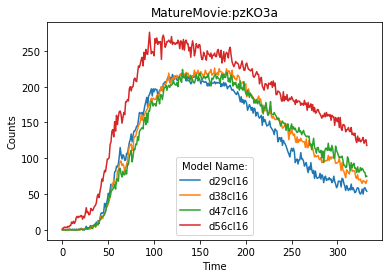

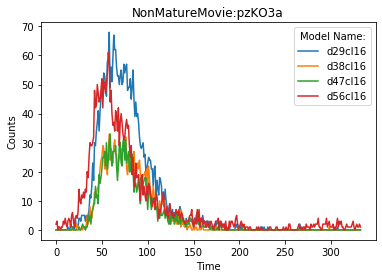

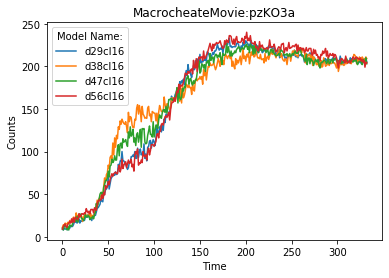

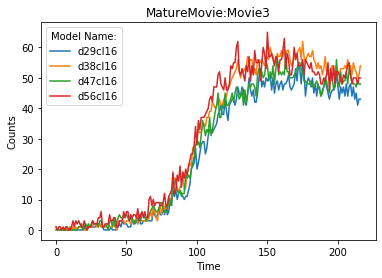

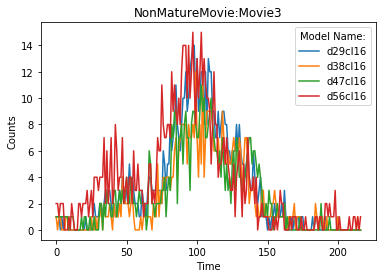

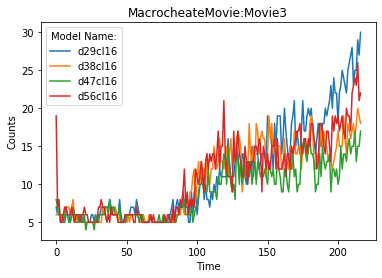

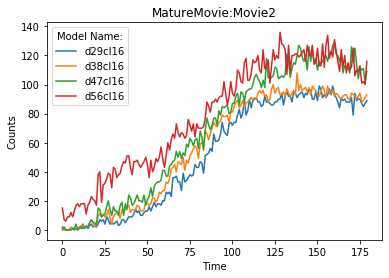

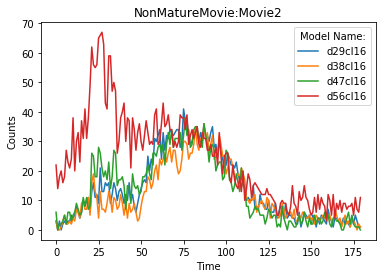

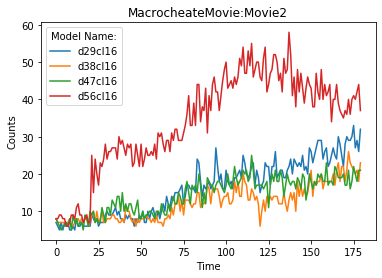

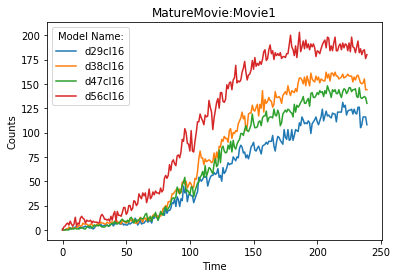

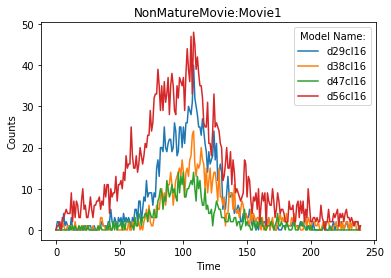

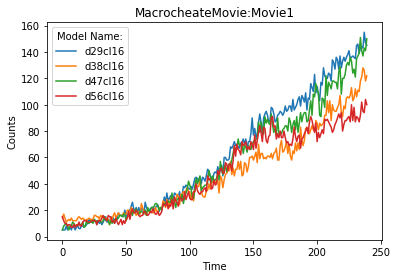

In [35]:
csv_dir = [ '/Users/aimachine/ONEATTests/Movies/StaticEvents/CSVResults/d29cl16/',
          '/Users/aimachine/ONEATTests/Movies/StaticEvents/CSVResults/d38cl16/','/Users/aimachine/ONEATTests/Movies/StaticEvents/CSVResults/d47cl16/',
          '/Users/aimachine/ONEATTests/Movies/StaticEvents/CSVResults/d56cl16/']
 
image_dir =  '/Users/aimachine/ONEATTests/Movies/'
save_dir = '/Users/aimachine/ONEATTests/Movies/StaticEvents/CSVResults/AllResults/' 

    
Raw_path = os.path.join(image_dir,'*.tif')
X = glob.glob(Raw_path)




Path(save_dir).mkdir(exist_ok = True)

for image_file in X:

  image= imread(image_file)
  image = np.asarray(image)
  Name = os.path.basename((os.path.splitext(image_file)[0])) 
  
  MasterTimeListNonMature = []
  MasterEventListNonMature = []

  MasterTimeListMature = []
  MasterEventListMature = []

  MasterTimeListMacrocheate = []
  MasterEventListMacrocheate = []

  MasterModelName = []
   

  for i in range(0, len(csv_dir)):
    
 

    

    ModelName = os.path.basename(os.path.dirname(csv_dir[i]))
    
    Mature = 'CNNMatureMNMCNNresnet_v2' + ModelName + 'Location'
    NonMature = 'CNNNonMatureMNMCNNresnet_v2'+ ModelName + 'Location'
    Macrocheate = 'CNNMacroKittyMNMCNNresnet_v2'+ ModelName + 'Location'
    MasterModelName = MasterModelName + [ModelName]

    #Mature Events 
    csv_Name = Mature + Name
    csv_file = csv_dir[i] + csv_Name + '.csv'
   
    if os.path.exists(csv_file):

      MasterTimeListMature,EventListMature = MultiCountTimeLapseevents(csv_file,image, 'Mature' + Name, save_dir)
      MasterEventListMature.append(EventListMature)
    #NonMature Events 
    csv_Name = NonMature + Name
    csv_file = csv_dir[i] + csv_Name + '.csv'

    if os.path.exists(csv_file):

      MasterTimeListNonMature,EventListNonMature = MultiCountTimeLapseevents(csv_file,image, 'NonMature' + Name, save_dir) 
      MasterEventListNonMature.append(EventListNonMature)
    #Macrocheate Events 
    csv_Name = Macrocheate + Name
    csv_file = csv_dir[i] + csv_Name + '.csv'

    if os.path.exists(csv_file):

      MasterTimeListMacrocheate,EventListMacrocheate = MultiCountTimeLapseevents(csv_file,image, 'MacroCheate'+ Name, save_dir)   
      MasterEventListMacrocheate.append(EventListMacrocheate)
     


  for i in range(0, len(MasterEventListMature)):
        plt.plot(MasterTimeListMature, MasterEventListMature[i],  label = MasterModelName[i])
        plt.ylabel('Counts')
        plt.xlabel('Time')
  plt.legend(title='Model Name:')
  plt.title('Mature' + '' + 'Movie:' + Name)
  plt.savefig(save_dir  + 'Mature' + Name + 'Inlier'   + '.png') 
  
  plt.show()

  for i in range(0, len(MasterEventListNonMature)):


        plt.plot(MasterTimeListNonMature, MasterEventListNonMature[i],  label = MasterModelName[i])
        plt.ylabel('Counts')
        plt.xlabel('Time')
        plt.legend(MasterModelName[i])
  plt.legend(title='Model Name:')
  plt.title( 'NonMature' + '' + 'Movie:' + Name)      
  plt.savefig(save_dir  + 'NonMature' + Name+ 'Inlier'  + '.png') 

  plt.show()
  #plt.figure(figsize=(15,15))
  for i in range(0, len(MasterEventListMacrocheate)):

        plt.plot(MasterTimeListMacrocheate, MasterEventListMacrocheate[i],  label = MasterModelName[i])
        plt.ylabel('Counts')
        plt.xlabel('Time')
  plt.legend(title='Model Name:')
  plt.title('Macrocheate'  +'' + 'Movie:' + Name)
  plt.savefig(save_dir  + 'Macrocheate' + Name+ 'Inlier'  + '.png') 
       

 
  plt.show()

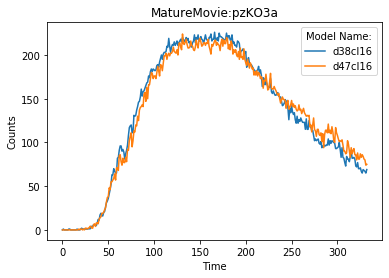

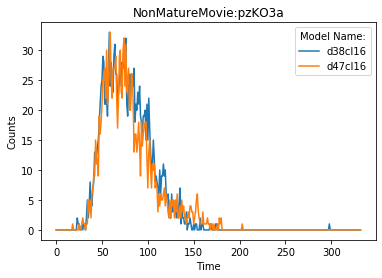

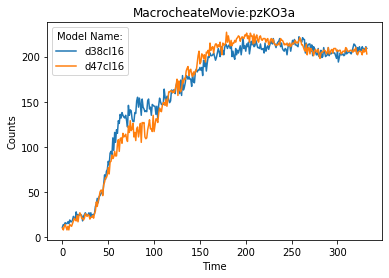

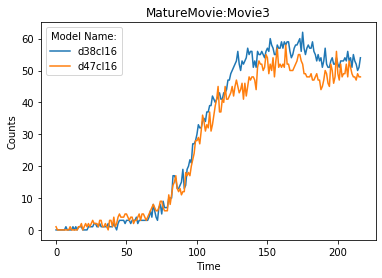

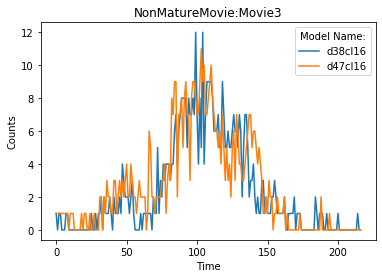

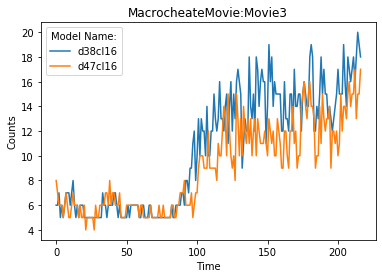

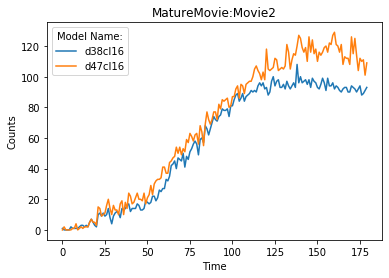

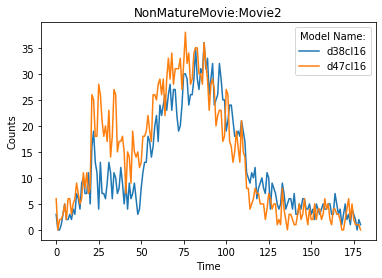

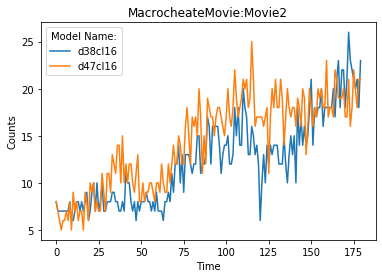

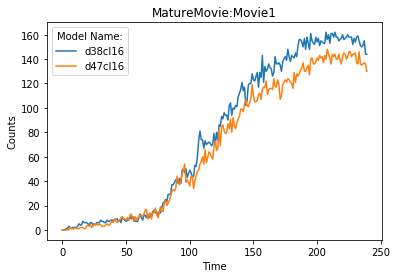

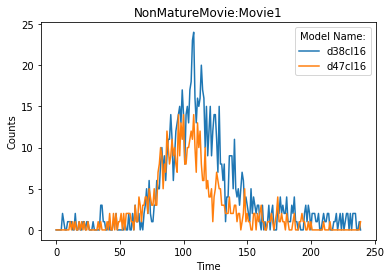

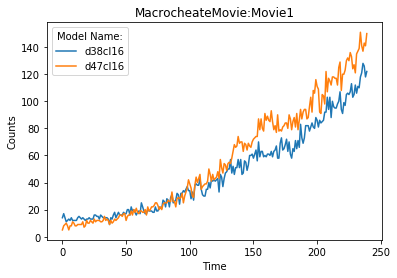

In [36]:
csv_dir = [ 
          '/Users/aimachine/ONEATTests/Movies/StaticEvents/CSVResults/d38cl16/','/Users/aimachine/ONEATTests/Movies/StaticEvents/CSVResults/d47cl16/'
 ]
image_dir =  '/Users/aimachine/ONEATTests/Movies/'
save_dir = '/Users/aimachine/ONEATTests/Movies/StaticEvents/CSVResults/AllResults/' 

    
Raw_path = os.path.join(image_dir,'*.tif')
X = glob.glob(Raw_path)




Path(save_dir).mkdir(exist_ok = True)

for image_file in X:

  image= imread(image_file)
  image = np.asarray(image)
  Name = os.path.basename((os.path.splitext(image_file)[0])) 
  
  MasterTimeListNonMature = []
  MasterEventListNonMature = []

  MasterTimeListMature = []
  MasterEventListMature = []

  MasterTimeListMacrocheate = []
  MasterEventListMacrocheate = []

  MasterModelName = []
   

  for i in range(0, len(csv_dir)):
    
 

    

    ModelName = os.path.basename(os.path.dirname(csv_dir[i]))
    
    Mature = 'CNNMatureMNMCNNresnet_v2' + ModelName + 'Location'
    NonMature = 'CNNNonMatureMNMCNNresnet_v2'+ ModelName + 'Location'
    Macrocheate = 'CNNMacroKittyMNMCNNresnet_v2'+ ModelName + 'Location'
    MasterModelName = MasterModelName + [ModelName]

    #Mature Events 
    csv_Name = Mature + Name
    csv_file = csv_dir[i] + csv_Name + '.csv'
   
    if os.path.exists(csv_file):

      MasterTimeListMature,EventListMature = MultiCountTimeLapseevents(csv_file,image, 'Mature' + Name, save_dir)
      MasterEventListMature.append(EventListMature)
    #NonMature Events 
    csv_Name = NonMature + Name
    csv_file = csv_dir[i] + csv_Name + '.csv'

    if os.path.exists(csv_file):

      MasterTimeListNonMature,EventListNonMature = MultiCountTimeLapseevents(csv_file,image, 'NonMature' + Name, save_dir) 
      MasterEventListNonMature.append(EventListNonMature)
    #Macrocheate Events 
    csv_Name = Macrocheate + Name
    csv_file = csv_dir[i] + csv_Name + '.csv'

    if os.path.exists(csv_file):

      MasterTimeListMacrocheate,EventListMacrocheate = MultiCountTimeLapseevents(csv_file,image, 'MacroCheate'+ Name, save_dir)   
      MasterEventListMacrocheate.append(EventListMacrocheate)
     


  for i in range(0, len(MasterEventListMature)):
        plt.plot(MasterTimeListMature, MasterEventListMature[i],  label = MasterModelName[i])
        plt.ylabel('Counts')
        plt.xlabel('Time')
  plt.legend(title='Model Name:')
  plt.title('Mature' + '' + 'Movie:' + Name)
  plt.savefig(save_dir  + 'Mature' + Name+ 'Core'  + '.png') 
  
  plt.show()

  for i in range(0, len(MasterEventListNonMature)):


        plt.plot(MasterTimeListNonMature, MasterEventListNonMature[i],  label = MasterModelName[i])
        plt.ylabel('Counts')
        plt.xlabel('Time')
        plt.legend(MasterModelName[i])
  plt.legend(title='Model Name:')
  plt.title( 'NonMature' + '' + 'Movie:' + Name)      
  plt.savefig(save_dir  + 'NonMature' + Name+ 'Core'   + '.png') 

  plt.show()
  #plt.figure(figsize=(15,15))
  for i in range(0, len(MasterEventListMacrocheate)):

        plt.plot(MasterTimeListMacrocheate, MasterEventListMacrocheate[i],  label = MasterModelName[i])
        plt.ylabel('Counts')
        plt.xlabel('Time')
  plt.legend(title='Model Name:')
  plt.title('Macrocheate'  +'' + 'Movie:' + Name)
  plt.savefig(save_dir  + 'Macrocheate' + Name+ 'Core'   + '.png') 
       

 
  plt.show()

###### 